# Introduction to Machine Learning with Decision Trees, Random Forests, and XGBoost

Lesson Overview:
In this lesson, we will cover the basics of machine learning using three popular algorithms: Decision Trees, Random Forests, and XGBoost. We'll start by exploring how to process data with both categorical and continuous features, followed by a step-by-step implementation of each algorithm.

In [2]:
!pip install ucimlrepo

## Data Processing

In this section, we load the dataset, separate features and target variable, and encode categorical features using OneHotEncoding. This step prepares the data for training our machine learning models.


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Adult dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# variable information
print(f'Features {X}')
print(f'Labels {y}')

Features        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2     

### Separate Features and Target Variable

In [4]:
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X, y, test_size=0.2, random_state=42)

### Encode Categorical Features

This modification uses the align method to ensure that the one-hot encoded DataFrames for the training and testing sets have the same columns. Any columns present in one set but not in the other will be added with zeros.

In [5]:
# One-hot encode categorical features with column alignment
X_train_adult = pd.get_dummies(X_train_adult)
X_test_adult = pd.get_dummies(X_test_adult)

# Align columns to ensure consistency between training and testing sets
X_train_adult, X_test_adult = X_train_adult.align(X_test_adult, join='outer', axis=1, fill_value=0)

## Decision Trees

A decision tree is a popular machine learning algorithm that is used for both classification and regression tasks. It models decisions as a tree-like structure where an input is progressively split into subsets based on certain features. Each internal node of the tree represents a decision based on a particular feature, and each leaf node represents the outcome or decision.




1.   **Root Node**: The tree starts with a root node that includes the entire dataset.
2. **Feature Selection**: The algorithm evaluates different features in the dataset to determine the best feature to split the data. The goal is to find the feature that provides the best separation of the data into distinct classes or values.
3. **Splitting**: The dataset is split into subsets based on the chosen feature. Each branch represents a possible outcome or decision based on the feature's value.
4. **Recursive Process**: The splitting process is then applied recursively to each subset. At each internal node, a decision is made based on a specific feature, and the dataset is divided into subsets accordingly.
5. **Stopping Criteria**: The recursive process continues until a stopping criteria is met. This could be a predefined depth of the tree, a minimum number of samples in a leaf node, or other criteria. These criteria help prevent overfitting.
6. **Leaf Nodes**: The final nodes of the tree are called leaf nodes, and they represent the output or decision. For classification tasks, each leaf corresponds to a specific class, while for regression tasks, the leaf nodes contain the predicted values.
7. **Prediction**: To make predictions for new data, you traverse the tree from the root to a leaf node based on the values of the input features. The predicted output is then based on the majority class (for classification) or the average value (for regression) of the samples in the leaf node.


Decision trees are popular because they are easy to understand and interpret. However, they are prone to overfitting, and various techniques such as pruning and setting stopping criteria are used to mitigate this issue. Additionally, ensemble methods like Random Forests and Gradient Boosted Trees are often employed to improve the predictive performance of decision trees.


#### Example
Let's consider a simple example of a decision tree for a binary classification problem, where the goal is to determine whether a person will play golf based on weather conditions. The features are "*Outlook*," "*Temperature*," "*Humidity*," and "*Wind*."

Decision Tree for Play Golf:

                          Outlook
                           / | \
                          /  |  \
                  Sunny   | Overcast | Rainy
                         \  /           \
                          \/              \
                   Humidity <= 75         No
                     /       \
                    /         \
                 Yes           No



Here's a step-by-step breakdown:

1. **Root Node**: The root node considers the feature "Outlook."
2. **Splitting at Outlook**: Three branches are created based on different outlook conditions: Sunny, Overcast, and Rainy.
3. **Further Splitting**: For the "Sunny" branch, the decision is based on the "Humidity" feature. If humidity is less than or equal to 75, the decision is "Yes" (play golf), otherwise "No." For the "Overcast" branch, the decision is "Yes" directly without further splitting. For the "Rainy" branch, no additional splitting is done, and the decision is "No."
4. **Leaf Nodes**: The leaf nodes represent the final decisions. In this case, "Yes" means play golf, and "No" means do not play golf.


This simple decision tree provides a set of rules to decide whether a person will play golf based on the given weather conditions. Note that this is a basic example, and in a real-world scenario, decision trees can be more complex with additional features and nodes.**Also, it's important to consider overfitting and use techniques like pruning to optimize the tree's performance.**

In [ ]:
# Import DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_adult, y_train_adult)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test_adult)

# Evaluate the accuracy of the model
dt_accuracy = accuracy_score(y_test_adult, dt_predictions)
print(f'Test accuracy {dt_accuracy}')

Test accuracy 0.4677039615109018


## Random Forests

Random Forest is an ensemble learning method that combines multiple individual decision trees to create a more robust and accurate model. It is particularly effective in addressing the overfitting issue associated with individual decision trees. **The key idea behind Random Forest is to build a collection of diverse trees and then aggregate their predictions**.

Here's an explanation of how Random Forest works:

1. **Bootstrapped Sampling (Bagging)**: Random Forest starts by creating multiple subsets of the original dataset through bootstrapped sampling. This means that for each tree in the forest, a random sample of the same size as the original dataset is drawn with replacement. Some data points may appear multiple times in a subset, while others may not appear at all.
2. **Random Feature Selection**: For each tree in the forest, a random subset of features is selected to split nodes at each decision point. This helps to decorrelate the trees, making the ensemble more robust.
3. **Building Decision Trees**: A decision tree is built for each subset of the data using the random feature subset. The tree-building process involves recursively selecting features and splitting data into subsets based on these features until a stopping criterion is met (e.g., a maximum depth is reached).
4. **Voting (Classification) or Averaging (Regression)**: Once all the individual trees are constructed, they "vote" in the case of classification or contribute their predictions in the case of regression. For classification problems, the class that receives the majority of votes becomes the predicted class. For regression problems, the average of all predictions is taken.
5. **Reducing Overfitting**: The aggregation of predictions from multiple trees helps reduce overfitting. Since each tree is trained on a different subset of data and features, they capture different aspects of the underlying patterns in the data. The diversity among the trees allows the ensemble to generalize well to new, unseen data.
6. **Advantages of Random Forest**: Improved Accuracy --> Random Forests often provide higher accuracy compared to individual decision trees. Robustness --> The ensemble nature of Random Forests makes them less sensitive to noise and outliers in the data. Feature Importance --> Random Forests can provide insights into feature importance, helping to identify which features contribute more to the predictive performance.

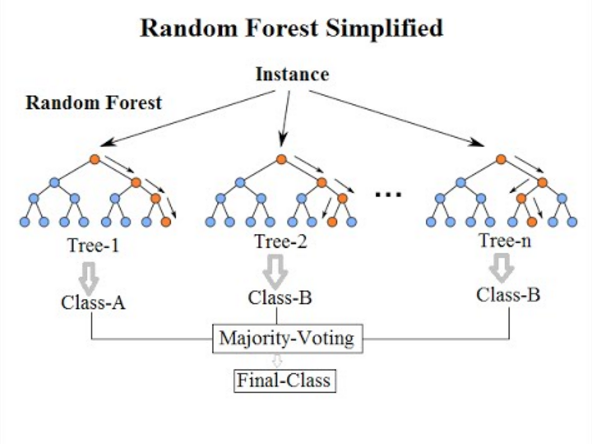

In [ ]:
# Import RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # The function to measure the quality of a split
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42,  # Seed for random number generation
    n_jobs=None,  # Number of jobs to run in parallel for both fit and predict
    verbose=0,  # Controls the verbosity of the tree-building process
    class_weight=None,  # Weights associated with classes in the form {class_label: weight}
    warm_start=False  # If True, reuse the solution of the previous call to fit and add more estimators
)
# Train the model
rf_model.fit(X_train_adult, y_train_adult.values.ravel())  # Use .values.ravel() to convert to 1-dimensional array

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_adult)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test_adult, rf_predictions)
print(f'Test accuracy {rf_accuracy}')

Test accuracy 0.5371071757600573


### Grid Search for Hyperparameter Optimization

Hyperparameter optimization is a crucial step in the process of building machine learning models. **Hyperparameters are configuration settings for a model that are not learned from the data but need to be set prior to the training process**. Examples include the learning rate in gradient boosting, the number of layers in a neural network, or the depth of a decision tree.

Hyperparameter optimization aims to find the **set of hyperparameters that results in the best model performance** on a given task. It involves searching through a hyperparameter space, which is the range of possible values for each hyperparameter, to identify the combination that maximizes or minimizes a specified objective function, such as accuracy, F1 score, or mean squared error.

One common approach to hyperparameter optimization is **Grid Search**, which is an exhaustive search technique that evaluates all possible combinations of hyperparameter values within a predefined grid.

Here's how Grid Search works:


1. **Define Hyperparameter Grid**: Specify a grid of hyperparameter values that you want to explore. For each hyperparameter, define a set of possible values to be considered.
2. **Cross-Validation**: Divide the training data into multiple folds (or subsets). The model is trained on some folds and evaluated on others, and this process is repeated for different folds.
3. **Model Training**: For each combination of hyperparameter values in the grid, train a model using the training data.
4. **Model Evaluation**: Evaluate the model's performance on the validation set (the fold not used for training) using the specified evaluation metric.
5. **Select Best Hyperparameters**: Identify the combination of hyperparameters that results in the best performance according to the chosen evaluation metric.
6. **Optional Testing**: Optionally, test the final selected model on a separate test set to assess its generalization performance.


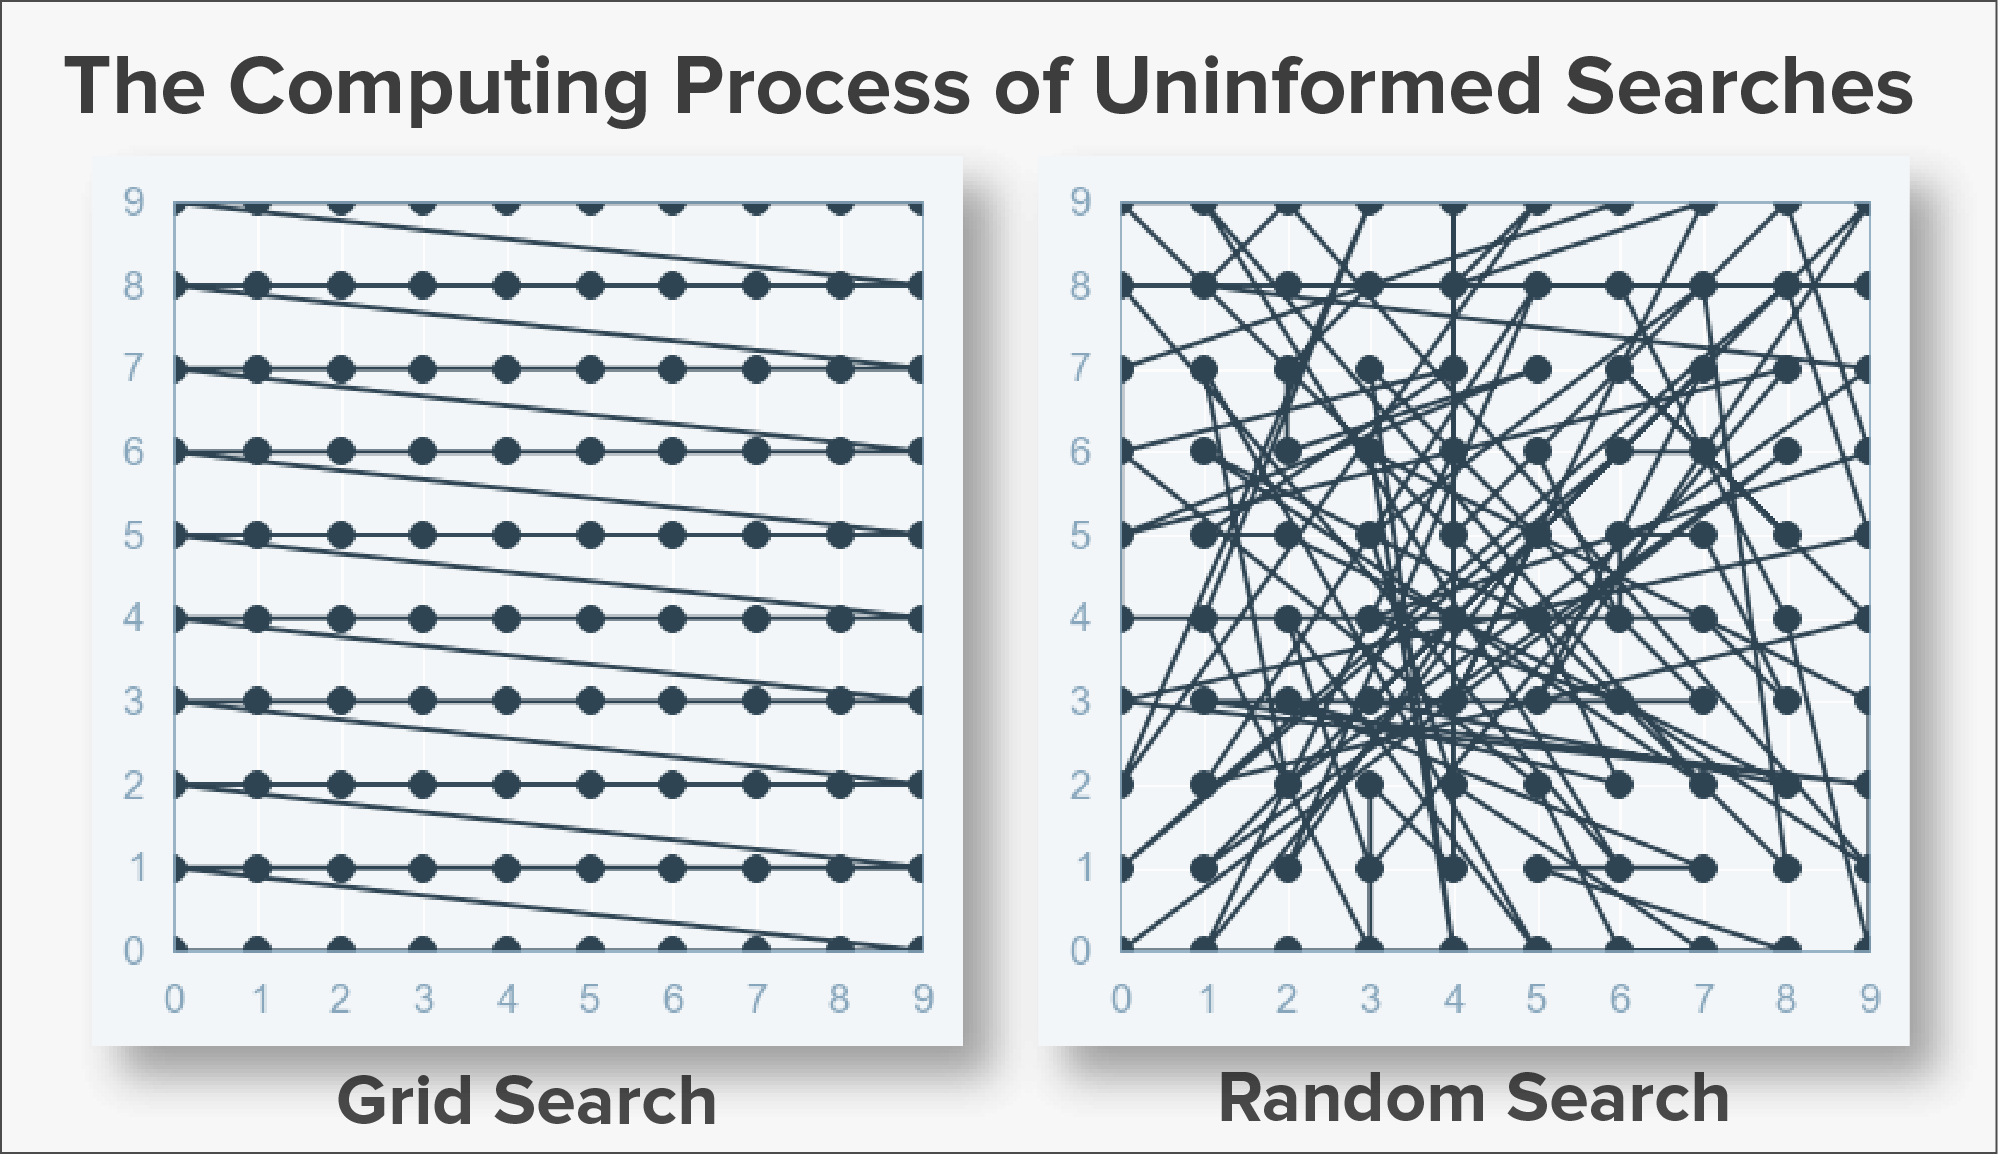

Grid Search is straightforward and systematic, ensuring that all combinations are explored. However, it can be computationally expensive, especially when dealing with a large hyperparameter space or a large dataset. As a result, more advanced techniques such as Randomized Search and Bayesian Optimization are often used to efficiently explore the hyperparameter space.

**Advantages of Grid Search:**

1. Exhaustive Search: Grid Search explores all combinations within the specified hyperparameter grid.
2. Systematic: The search process is systematic and easy to understand.

**Disadvantages of Grid Search**:

1. **Computational Cost:** It can be computationally expensive, especially with a large hyperparameter space.
2. **Limited Exploration:** It may miss optimal values in the hyperparameter space due to the discrete nature of the search.

Despite its limitations, Grid Search remains a valuable tool for hyperparameter optimization, especially when computational resources allow for an exhaustive search.







In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_adult, y_train_adult)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_rf_model.predict(X_test_adult)

# Evaluate the accuracy of the best model
accuracy_best = accuracy_score(y_test_adult, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 15}
Best Model Accuracy: 0.5744702630770806


Notice that we used 5-fold cross-validations to perform hyperparameter optimization.

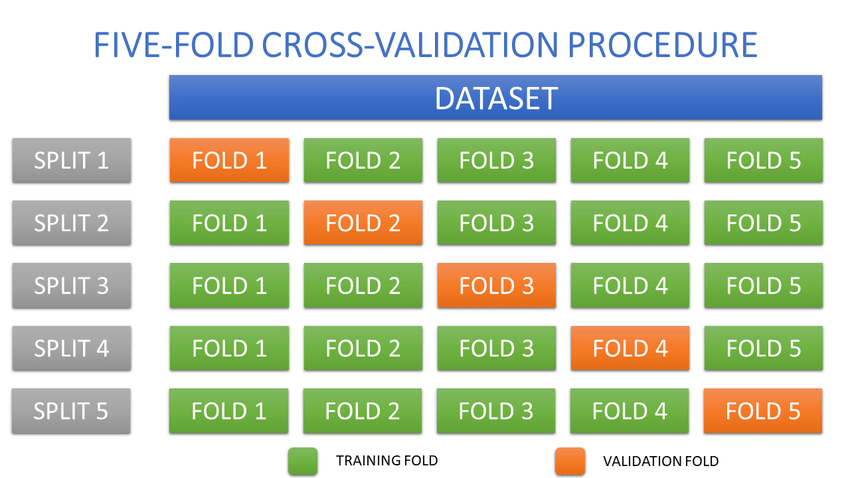

## XGBoost (Extreme Gradient Boosting)

XGBoost is an efficient and scalable implementation of gradient boosting that has gained popularity for its speed and performance. Developed by Tianqi Chen, XGBoost is widely used in machine learning competitions and real-world applications. Here are key features and concepts related to XGBoost:

1. **Regularization**: XGBoost incorporates L1 (LASSO) and L2 (Ridge) regularization terms into the objective function. This helps prevent overfitting and improves generalization.
2. **Gradient Boosting with Trees**: XGBoost is primarily used for gradient boosting with decision trees as weak learners. It builds trees sequentially, with each new tree addressing the errors of the combined ensemble of previous trees.
3. **Objective Function**: The objective function in XGBoost combines a loss function (related to the task at hand, e.g., binary classification or regression) and regularization terms. The model aims to minimize this objective function during training.
4. **Tree Pruning**: XGBoost uses a technique called "tree pruning" to remove branches that do not contribute significantly to reducing the loss. This helps control the complexity of the trees.
5. **Feature Importance**: XGBoost provides a feature importance score, indicating the contribution of each feature to the model. This can be helpful for feature selection and understanding the model.
6. **Cross-Validation**: XGBoost supports built-in cross-validation to assess model performance during training.
7. **Handling Missing Values**: XGBoost has mechanisms for handling missing values, reducing the need for preprocessing steps like imputation.
8. **Early Stopping**: XGBoost supports early stopping, allowing the training process to stop when the model's performance on a validation set ceases to improve.

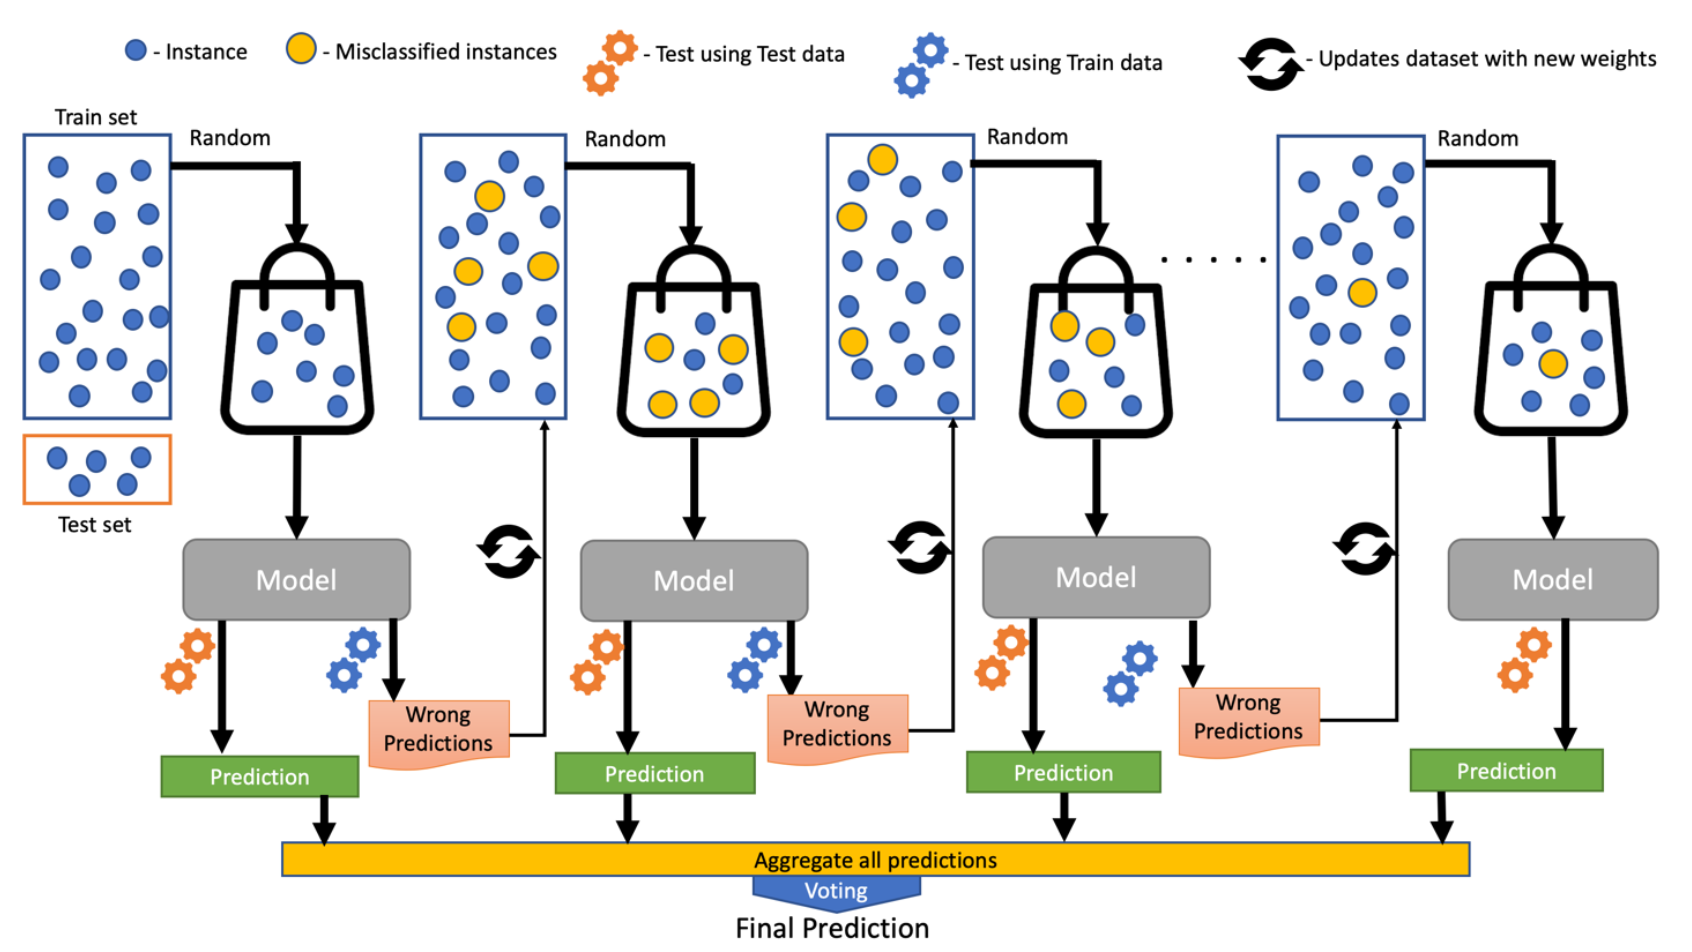

### What is Gradient boosting?

A special case of boosting algorithm where errors are minimized by a gradient descent algorithm and produce a model in the form of weak prediction models e.g. decision trees.

The major difference between boosting and gradient boosting is how both the algorithms update model (weak learners) from wrong predictions. Gradient boosting adjusts weights by the use of gradient (a direction in the loss function) using an algorithm called Gradient Descent, which iteratively optimizes the loss of the model by updating weights. Loss normally means the difference between the predicted value and actual value. For regression algorithms, we use MSE (Mean Squared Error) loss as an evaluation metric while for classification problems, we use logarithmic loss.

$$w = w - \eta \nabla w$$

$$\nabla w = \frac{\partial \mathcal{L}}{\partial w}$$ where $\mathcal{L}$ is the loss.

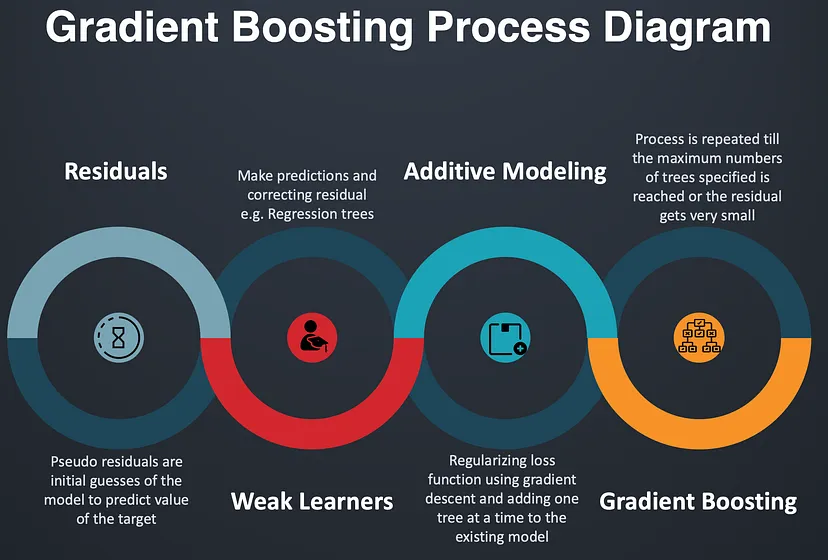

Gradient boosting uses [Additive Modeling](https://blog.paperspace.com/implementing-gradient-boosting-regression-python/) in which a new decision tree is added one at a time to a model that minimizes the loss using gradient descent. Existing trees in the model remain untouched and thus slow down the rate of overfitting. The output of the new tree is combined with the output of existing trees until the loss is minimized below a threshold or specified limit of trees is reached.

Additive Modeling in mathematics is a breakdown of a function into the addition of $N$ subfunctions. In statistical terms, it can be thought of as a regression model in which response $y$ is the arithmetic sum of individual effects of predictor variables $x$.

In [12]:
# Install xgboost if not already installed
# !pip install xgboost

# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Encode the target variable using Label Encoding
label_encoder_xgb = LabelEncoder()
y_train_adult_encoded = label_encoder_xgb.fit_transform(y_train_adult)
y_test_adult_encoded = label_encoder_xgb.transform(y_test_adult)

# Train the model
xgb_model.fit(X_train_adult, y_train_adult_encoded.ravel())

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_adult)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_adult, xgb_predictions_original_labels)
print(f'Test accuracy {xgb_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Test accuracy 0.593100624424199


### Feature importance via XGBoost

XGBoost library provides a built-in function to plot features ordered by their importance. The function is plot_importance(model) and it takes the trained model as its parameter. The function gives an informative bar chart representing the significance of each feature and names them according to their index in the dataset. The importance is calculated based on an **importance_type** variable which takes the parameters

*weights* (default) — tells the times a feature appears in a tree

*gain* — is the average training loss gained when using a feature

*cover* — which tells the coverage of splits, i.e. the number of times a feature is used weighted by the total training point that falls in that branch.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

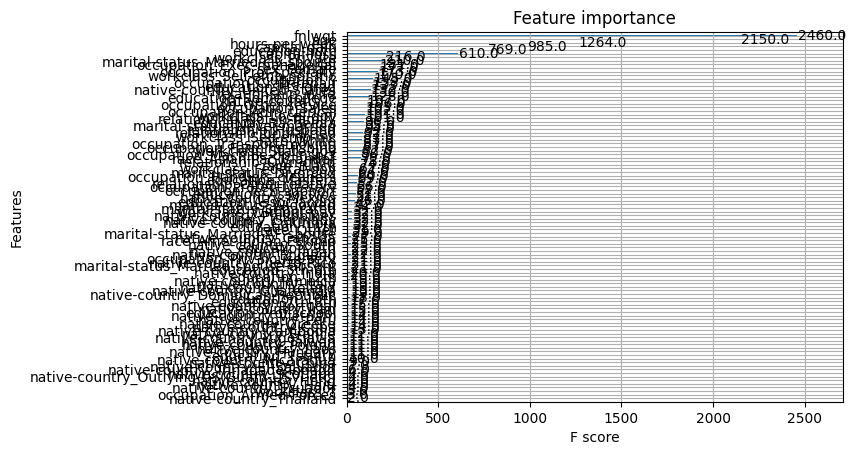

In [13]:
xgb.plot_importance(xgb_model)

<Axes: >

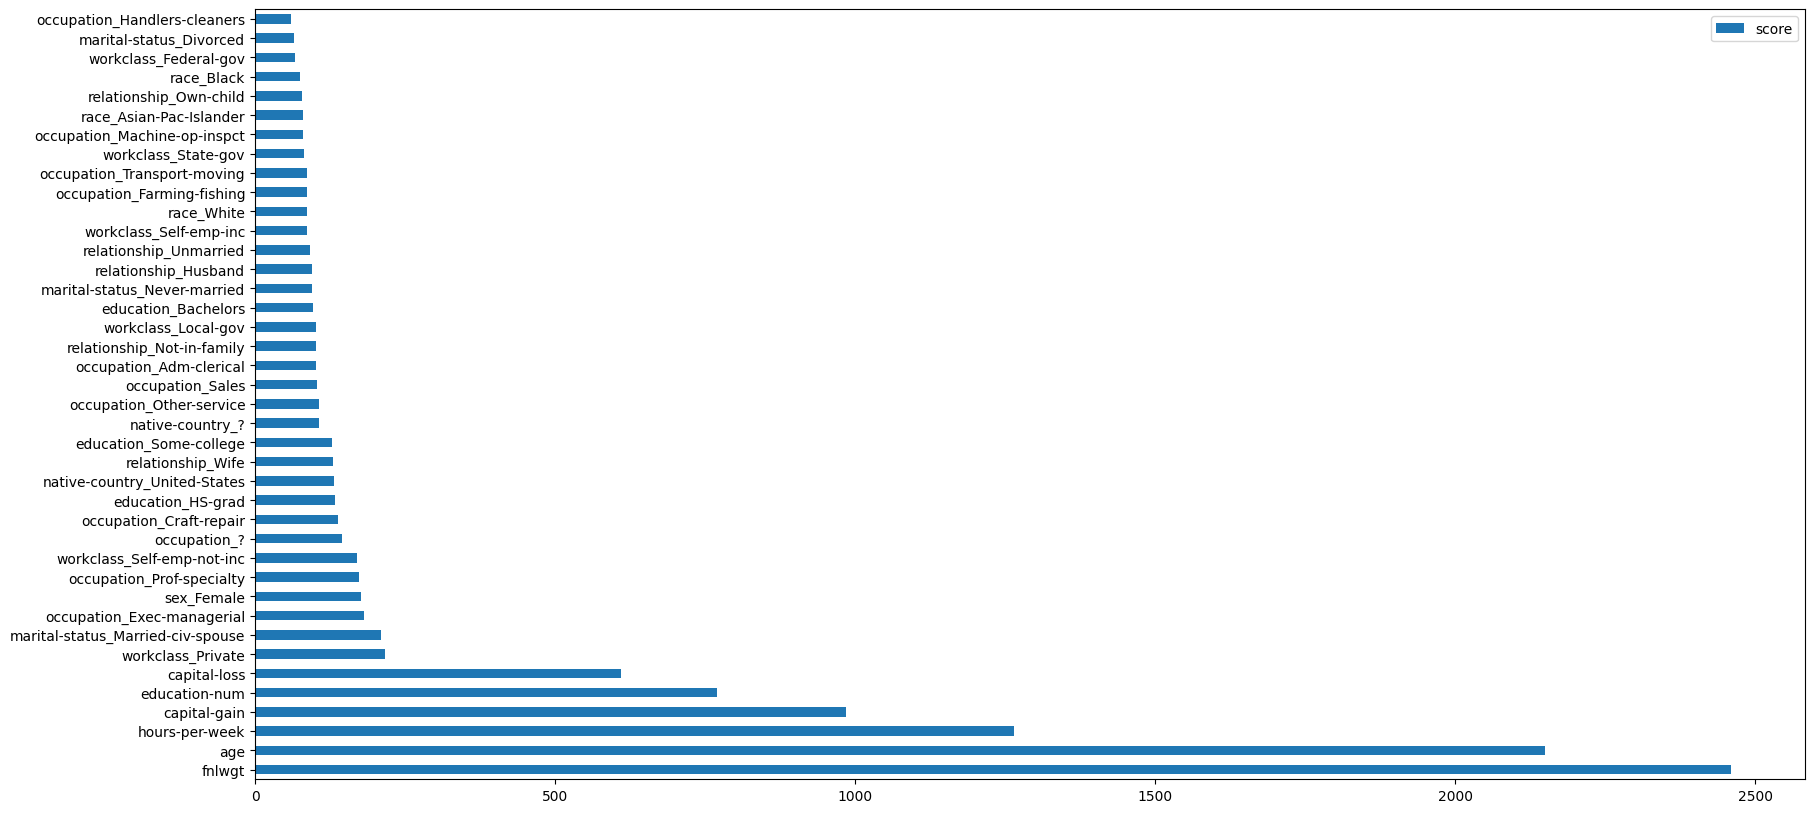

In [17]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Let's use SHAP

The SHAP summary plot provides a visual summary of the average magnitude and direction of the SHAP (SHapley Additive exPlanations) values for each feature in a machine learning model. SHAP values are designed to explain the output of any machine learning model by attributing the contribution of each feature to the model's predictions.

In [18]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.4 MB/s eta 0:00:00


1. **Feature Importance Bar Chart**: The main part of the summary plot is a horizontal bar chart, where each bar represents a feature. The length of each bar corresponds to the average magnitude of the SHAP values for that feature across all instances in the dataset.

[13:07:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


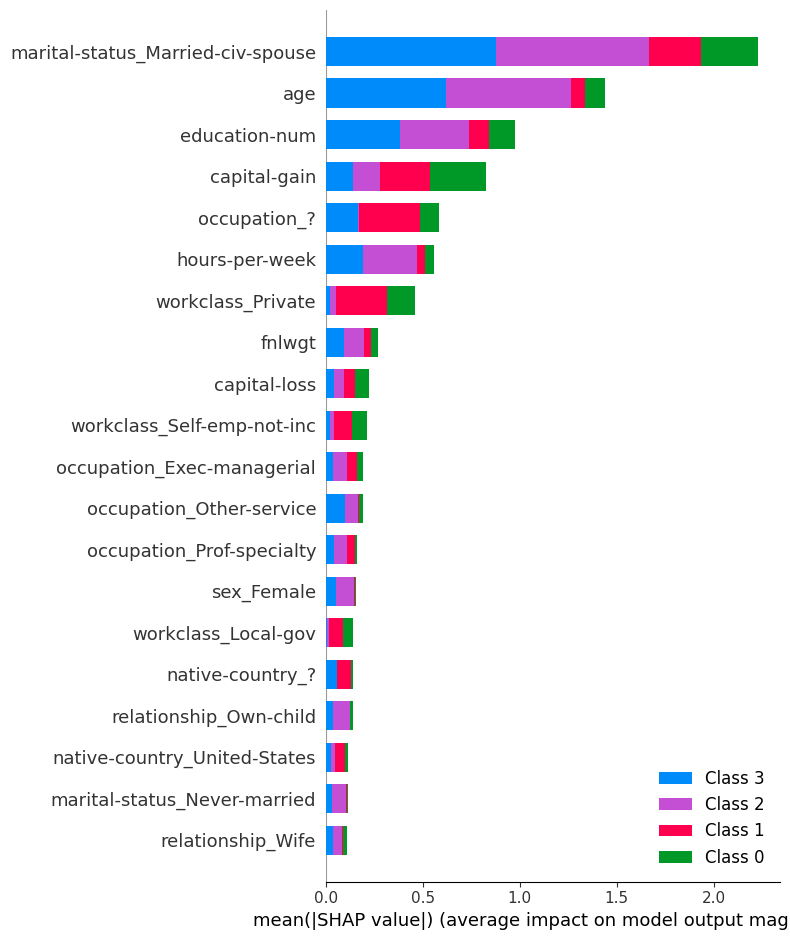

In [21]:
import shap

# Use the Tree Explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test_adult)

feature_names = X_train_adult.columns.values
# Plot summary plot (summary of feature importance for all instances)
shap.summary_plot(shap_values, X_test_adult, feature_names=feature_names, plot_type='bar')


2. **Color Coding**: The bars are color-coded based on the direction of the SHAP values. Features contributing to higher predictions are typically shown in a color gradient from blue to red, where blue represents lower values and red represents higher values.
3. **Reference Value**: The reference value (usually 0) is indicated by a vertical dashed line. Features to the right of the reference line contribute positively to the model's predictions, while features to the left contribute negatively.

[13:12:42] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


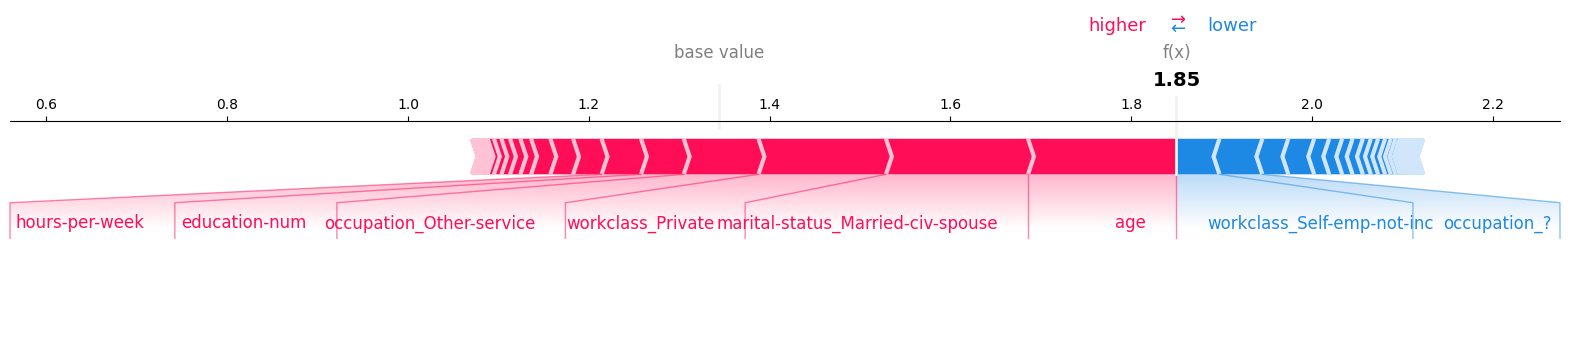

In [28]:
import shap

# Use the Tree Explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Choose a specific instance for which you want to explain predictions
instance_index = 0  # You can choose any index from your test set
instance = X_test_adult.values[instance_index]

# Calculate SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))

# Plot the feature contribution for the chosen instance
# If there are multiple classes, choose the class you want to explain
class_to_explain = 0  # Change this to the desired class index
shap_values_instance_class = shap_values_instance[class_to_explain]

# Plot the feature contribution for the chosen instance and class
shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

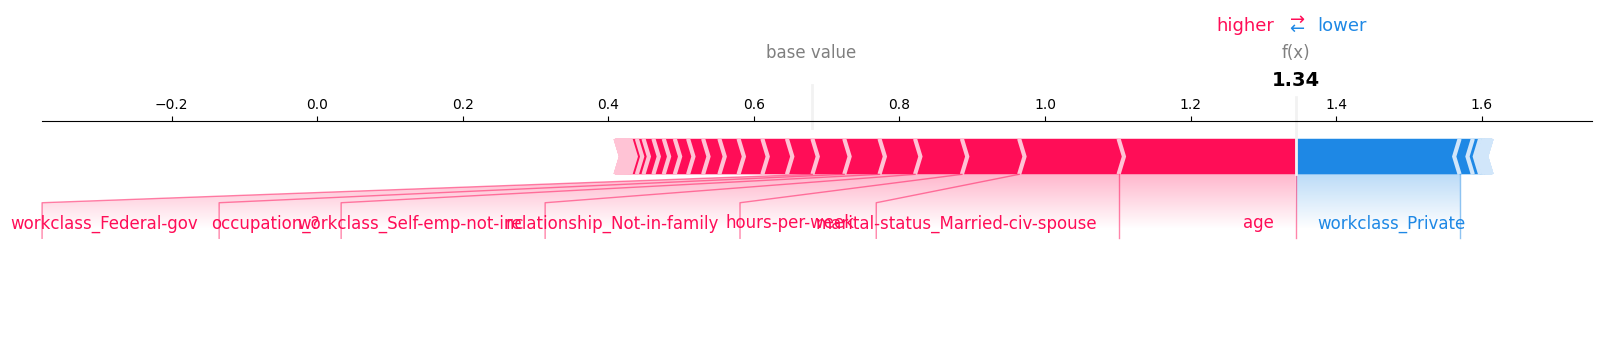

In [31]:
class_to_explain = 1  # Change this to the desired class index
shap_values_instance_class = shap_values_instance[class_to_explain]

# Plot the feature contribution for the chosen instance and class
shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)